## 作品3. 機率分配的樣貌

#### 姓名 : 林詠翔   $\quad$  學號 : 410977095  $\quad$   系級: 會計三

#### 目標 : 

- 繪製曾學過的分配函數，含連續與離散型。

- 連續型分配包括常態、卡方、T、Beta、F 等五種。利用改變分配函數的參數，觀察其分配函數的「長相」；畫出所有可能的「形狀」並說明（或標示）與參數間的關係。

- 離散型則選擇 波松 分配。

- 連續型分配函數繪圖以 PDF 為主。離散型分配含 PMF（stem 圖） 及 CDF （stairs 圖）。




#### 所需套件 : 

- scipy.stats( ) 統計數學用 ( 計算統計分佈 ( 連續型函數 & 離散型函數 ) )

- matplotlib.pyplot 

- numpy

- seaborn ( 調色用 )

<hr>



### 連續型分配函數 

#### 第 1 題 - 常態分配 ( normal distribution )

注意事項與討論 : 

- norm.pdf ( data , loc , moments , scale )，data= 數據集( x值 ) ，loc = mean ( 平均值 ) ， scale = 標準差值

- 在常態分配中，平均數和標準差為未知變數

- 第一種圖形為平均數固定，標準差變動之情況。此時loc = 0 

- 第二種圖形為標準差固定，此時moments不須設定，loc需改成np.arange()

- 必須將 data 的 矩陣 reshape 成 ( -1,1 ) 形狀 ，否則無法做矩陣乘法，會出現error

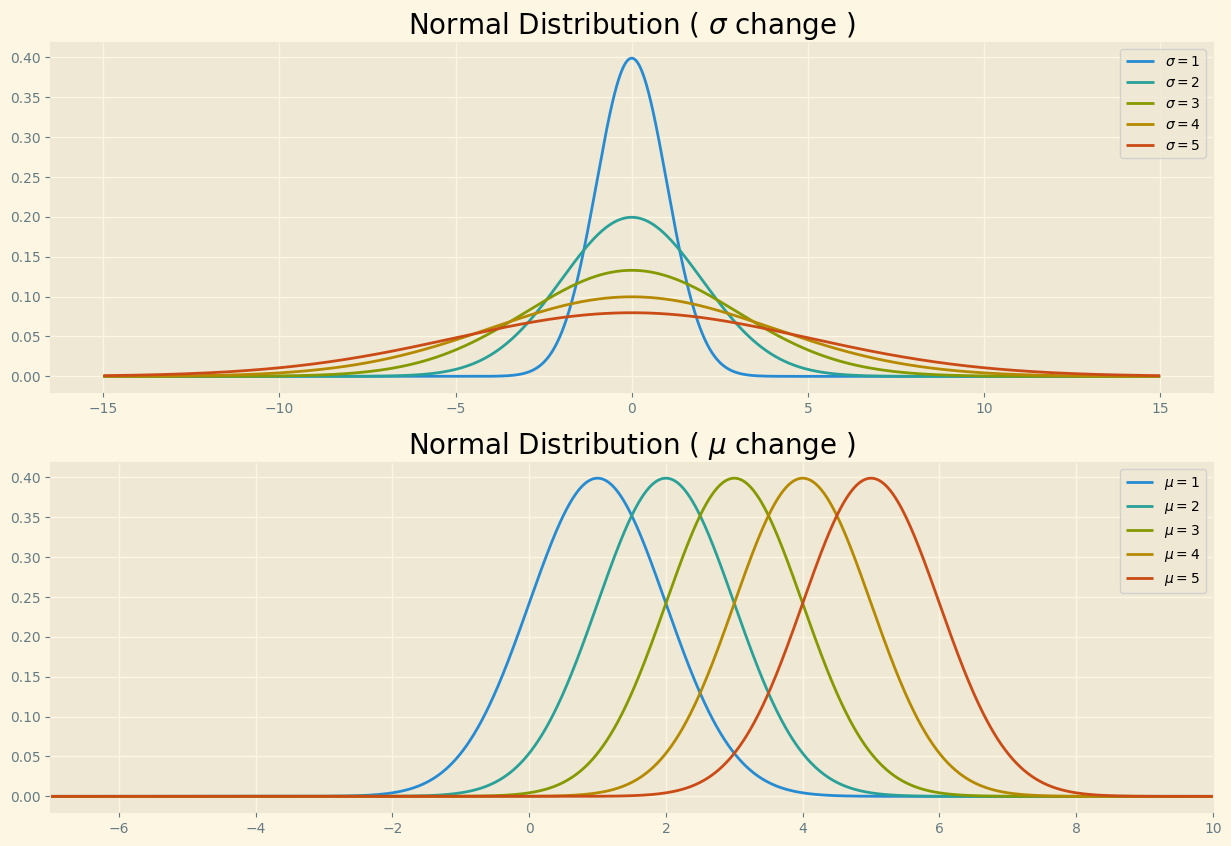

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

loc = 0
scale = np.arange(1, 6)
loc_mean = np.arange(1, 6)

x = np.linspace(-15, 15, 10000)
y_std = norm.pdf(x.reshape(-1, 1), loc, scale)
y_mean = norm.pdf(x.reshape(-1, 1), loc_mean)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].plot(x, y_std, label=["$\sigma={}$".format(i)
             for i in np.arange(1, 6)], linewidth=2)
axes[0].legend()
axes[0].set_title("Normal Distribution ( $\sigma$ change )", fontsize=20)

axes[1].plot(x, y_mean, label=["$\mu={}$".format(i)
             for i in np.arange(1, 6)], linewidth=2)
axes[1].set_xlim([-7, 10])
axes[1].legend()
axes[1].set_title("Normal Distribution ( $\mu$ change )", fontsize=20)


for i in range(2):
    axes[i].grid(True)


#### 第2題 : 卡方分配

注意事項與討論 :

- 隨著自由度增加，卡方分配圖會逐漸左偏，最後類似於常態分佈

- 卡方 = 標準常態平方 ( z 分配的平方 )，因此需限定x範圍在 x>0 部分 ( 原理與z-score相關 ，且屬右尾檢定，)

- df越小，甚至趨近於0的話，會在y軸附近產生漸進線



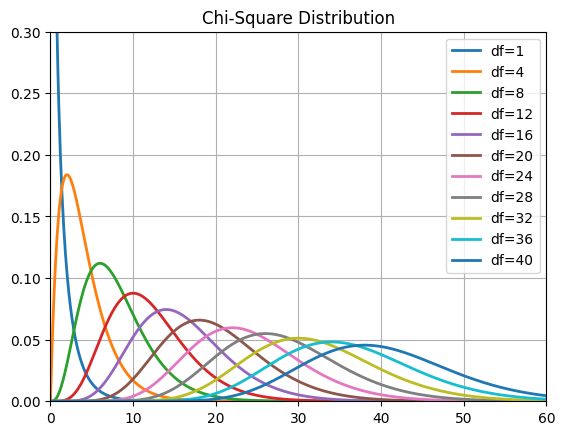

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib as mpl

d_freedom = np.arange(4, 40+1, 4)

x = np.linspace(0, 100, 1000)
y_chi = chi2.pdf(x.reshape(-1, 1), df=d_freedom)

ax = plt.gca()
cmap = mpl.colormaps["inferno"].resampled(6)
ax.plot(x, chi2.pdf(x.reshape(-1, 1), df=1),
        label="df={}".format(1), linewidth=2)
ax.plot(x, y_chi, label=["df={}".format(i)
        for i in np.arange(4, 40+1, 4)], linewidth=2)
ax.set_xlim([0, 60])
ax.set_ylim([0, 0.3])
ax.legend()
ax.set_title("Chi-Square Distribution")
ax.grid(True)


#### 第3題 : T分配

注意事項與討論 :

- T分配與標準常態分配相似 ( 同樣對稱於y=0 )

- t分配隨自由度升高，漸進於標準常態

- 和標準常態分配不同的是，由於t分配的變數是 df 而非 $\sigma$ ，因此適用於小樣本檢定

- 但當 df 超過一定數字時 (df=30)時，t-score 數值和 z-score 數值會十分趨近 ( 代表幾乎趨近於常態分佈 )，因此會有重疊現象產生
  ( 尤其 p( $\chi$ )越大時越明顯 )

- t 分配公式 : $f(t)=\frac{\gamma[(\nu+1)/2]}{\sqrt{\nu\pi}\gamma(\nu/2)}[1+\frac{t^{2}}{\nu}]^{-(\nu+1)/2}$，其中可

  變動的是$\nu$ ( 自由度 ) 和t值，而$t=\frac{x-\mu}{s/\sqrt{n}}$，其中$\mu$ ( 平均數 )為變動值

- scalar ( 純量 )愈大，$p(x)$ 最大值會愈小，曲線整體上升幅度會趨近平緩

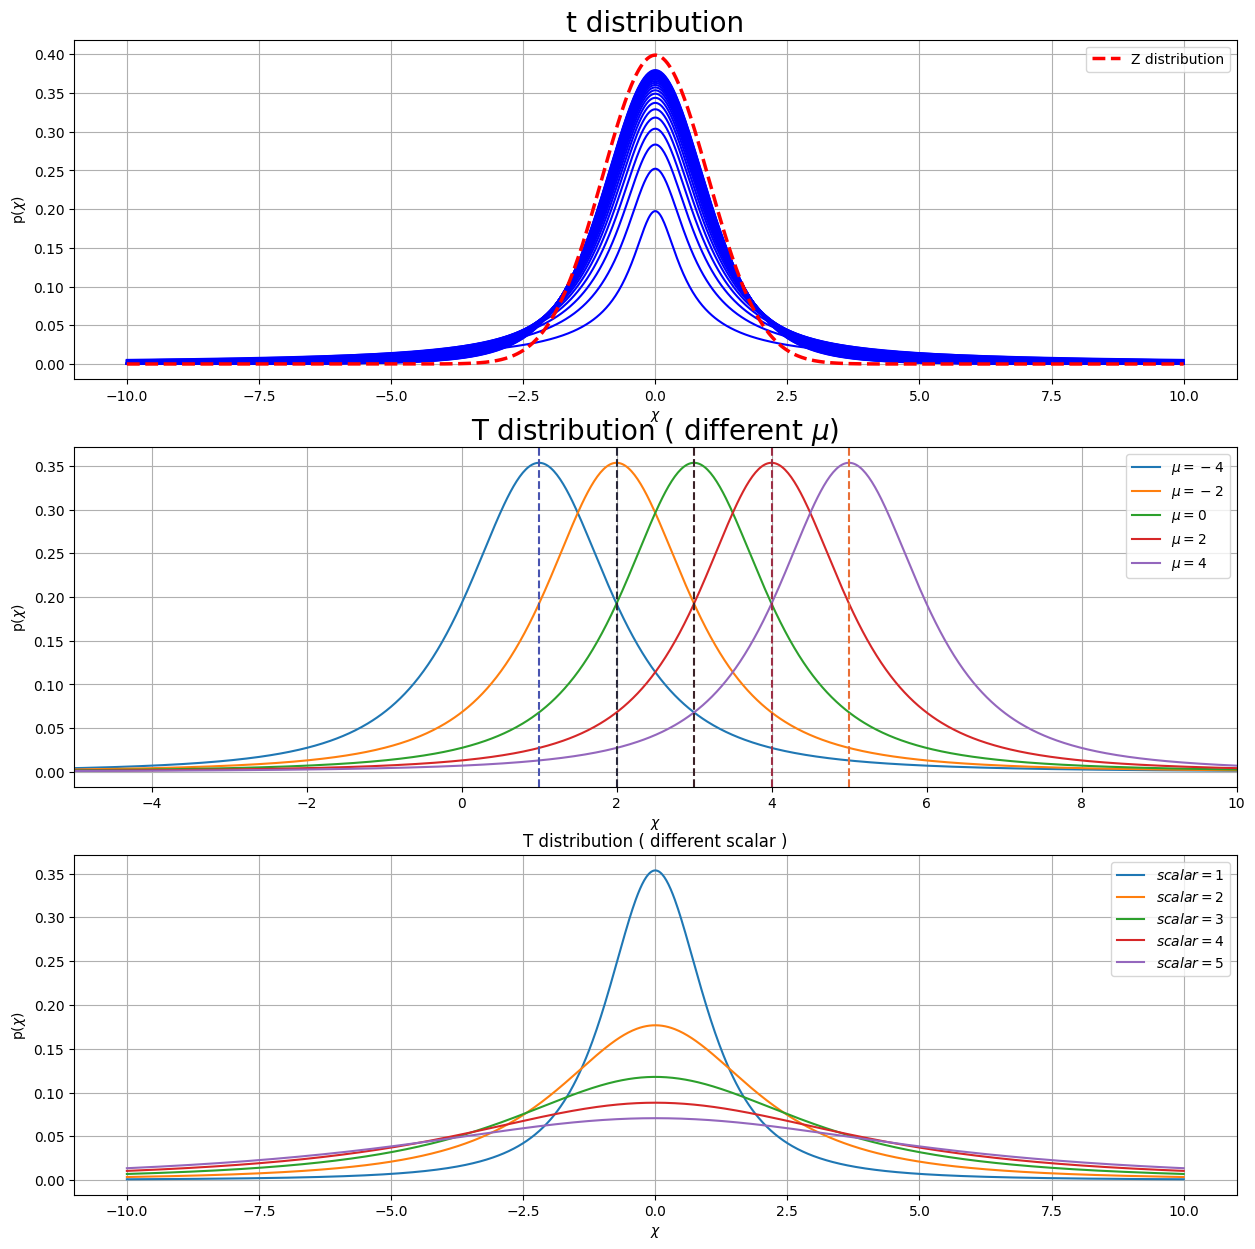

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns

c_palette = sns.color_palette("icefire")

x = np.linspace(-10, 10, 1000)
y_t = t.pdf(x.reshape(-1, 1), df=np.arange(0, 5.2, 0.2))
y_norm = norm.pdf(x.reshape(-1, 1), 0)
y_mc = t.pdf(x.reshape(-1, 1), df=2, loc=np.arange(1, 6))
y_scalar = t.pdf(x.reshape(-1, 1), df=2, scale=np.arange(1, 6))

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
axes[0].plot(x, y_t, color="blue")
axes[0].plot(x, y_norm, color="red", linestyle="--",
             label="Z distribution", linewidth=2.5)
axes[0].set_title("t distribution", fontsize=20)

axes[1].plot(x, y_mc, label=["$\mu={}$".format(i)
             for i in np.arange(-4, 6, 2)])
axes[1].set_xlim([-5, 10])
axes[1].set_title("T distribution ( different $\mu$)", fontsize=20)

axes[2].plot(x, y_scalar, label=["$scalar={}$".format(i)
             for i in np.arange(1, 6)])
axes[2].set_title("T distribution ( different scalar )")

for i in (np.arange(1, 6)):
    axes[1].axvline(x=i, linestyle="--", color=c_palette[i])


for i in range(3):
    axes[i].set_ylabel("p($\chi$)")
    axes[i].set_xlabel("$\chi$")
    axes[i].legend()
    axes[i].grid(True)


#### 第 4 題 : Beta 分配 

注意事項與討論 : 

- beta分配中的 $a$ & $b$ 必大於0，且連續區間必在(0,1)之間

- 當 $a$ 固定而 $b$ 遞增時，分配會逐漸右偏，且p(x)最大值會逐漸增加，但相對應的$x$值卻遞減 ( $a$ & $b$ 皆大於 1 )

- 反之 ，當$b$ 固定而 $a$ 遞增時，分配會逐漸左偏，且p(x)最大值會逐漸增加，同時相對應的$x$值卻遞增 ( $a$ & $b$ 皆大於 1 )

- 當 $a$ & $b$ 皆為1時，會形成連續性均勻機率分佈 ( Uniform probability distribution )

- 當 $a$ & $b$ 皆在 0-1之間且 $a=b$ 時，圖形開口向上，且連續區間中有一段與平均分配相似

- 當 $a=b$ 且 $a$ 和 $b$ 皆大於1時，p(x)最大值會逐漸遞增，形成與t分配相似的圖形

- 當 $a$ 和 $b$ 成等比且 $b/a>1$ 時，圖形會從右偏逐漸往左修正，形成類似t分配但稍微右偏的圖形





Text(0.5, 1.0, '$a+b=30$  $a=1,2,....,30$   $b=30-a$')

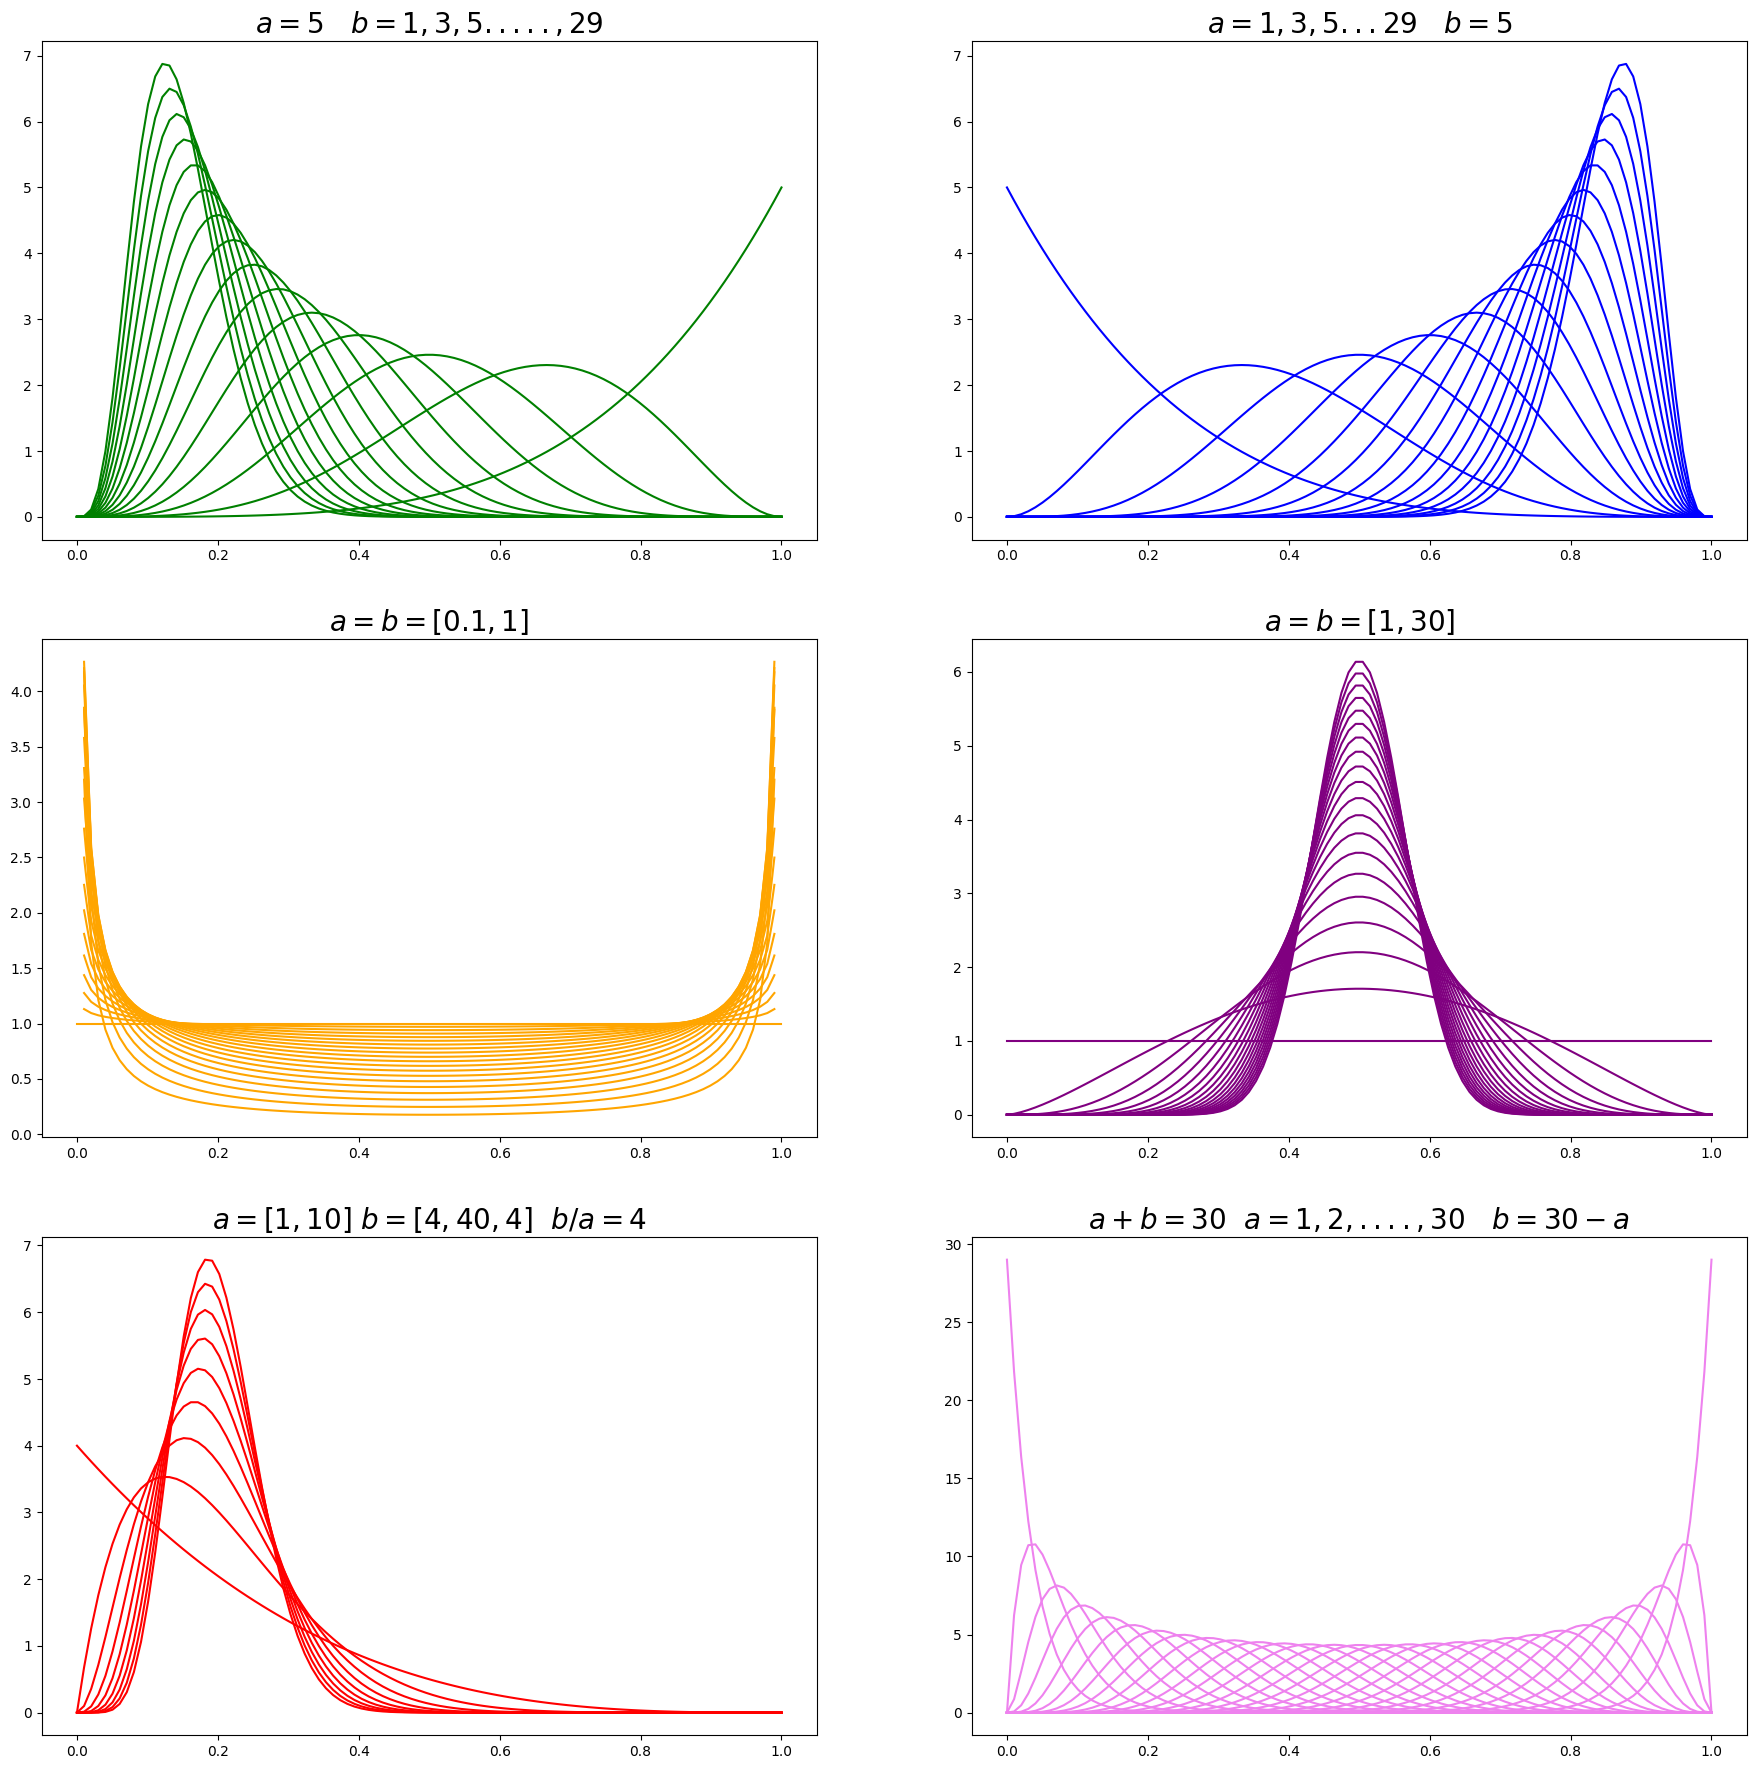

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 100)
y_beta = beta.pdf(x.reshape(-1, 1), 5, np.arange(1, 30, 2))
y_beta2 = beta.pdf(x.reshape(-1, 1), np.arange(1, 30, 2), 5)

y_beta3 = beta.pdf(x.reshape(-1, 1), np.linspace(0.1,
                   1, 20), np.linspace(0.1, 1, 20))
y_beta4 = beta.pdf(x.reshape(-1, 1), np.linspace(1, 30, 20),
                   np.linspace(1, 30, 20))

y_beta5 = beta.pdf(x.reshape(-1, 1), np.arange(1, 10, 1), np.arange(4, 40, 4))
y_beta6 = beta.pdf(x.reshape(-1, 1), np.arange(1, 31, 1),
                   30-np.arange(1, 31, 1))

fig, axes = plt.subplots(3, 2, figsize=(22, 22))
axes[0][0].plot(x, y_beta, color="green")
axes[0][0].set_title("$a=5$   $b=1,3,5.....,29$", fontsize=20)


axes[0][1].plot(x, y_beta2, color="blue")
axes[0][1].set_title("$a=1,3,5...29$   $b=5$", fontsize=20)

axes[1][0].plot(x, y_beta3, color="orange")
axes[1][0].set_title("$a=b=[0.1,1]$", fontsize=20)

axes[1][1].plot(x, y_beta4, color="purple")
axes[1][1].set_title("$a=b=[1,30]$", fontsize=20)

axes[2][0].plot(x, y_beta5, color="red")
axes[2][0].set_title("$a=[1,10]$ $b=[4,40,4]$  $b/a=4$", fontsize=20)

axes[2][1].plot(x, y_beta6, color="violet")
axes[2][1].set_title("$a+b=30$  $a=1,2,....,30$   $b=30-a$", fontsize=20)


#### 第 5 題 : F 分配

注意事項與討論 :

- 可用 .plt.style.use( name ) 轉換圖表風格

- F.pdf(x, dfn, dfd, loc=0, scale=1)，其中dfn = 分子自由度 (numerator degrees of freedom)， dfd = 分母自由度       (denominator degrees of freedom)

- F的範圍在 [ 0 , $\infty$ ] 之間 ，因此 F 必大於0

- 當 dfn 固定，dfd 變動時，圖形會逐漸左偏，同時機率密度函數最大值遞增

- 當 dfn 變動 ，而 dfd 變動時，圖形同樣會逐漸左偏，但相對第1張圖較為雜亂，出現相似於自由度小的卡方分配曲線

- 當 dfn 在 0-1 之間 ，而 dfd 不小於 1 情況下 ， 圖形近似指數分配圖形

- 當 dfn 不小於 1 ，而 dfd 在 0-1 之間情況下 ， 圖形會逐漸左偏 ( 幅度小於前2張圖 )，且相較第3張圖有頂點

- 當 dfn = dfd 時，圖形會漸漸左偏，最終形成類似T分配圖形，且分母和分子自由度超過一固定值後，圖形開始高度重疊

- 當 dfn + dfd = 固定值時，圖形會逐漸左偏，幾乎和圖2相同

- 將 f.pdf() 的 loc 參數 ( 代表隨機變數平均值 ) 調大後，會發現圖形往右平移  ( 和圖1相比 )

- 將 f.pdf() 的 scale 參數 ( 代表隨機變數標準差 ) 調大後，會發現圖形變得較平緩，不同曲線間距離也變較大

Text(0.5, 1.0, '$\\sigma=7$ ( compared with graph 1 )')

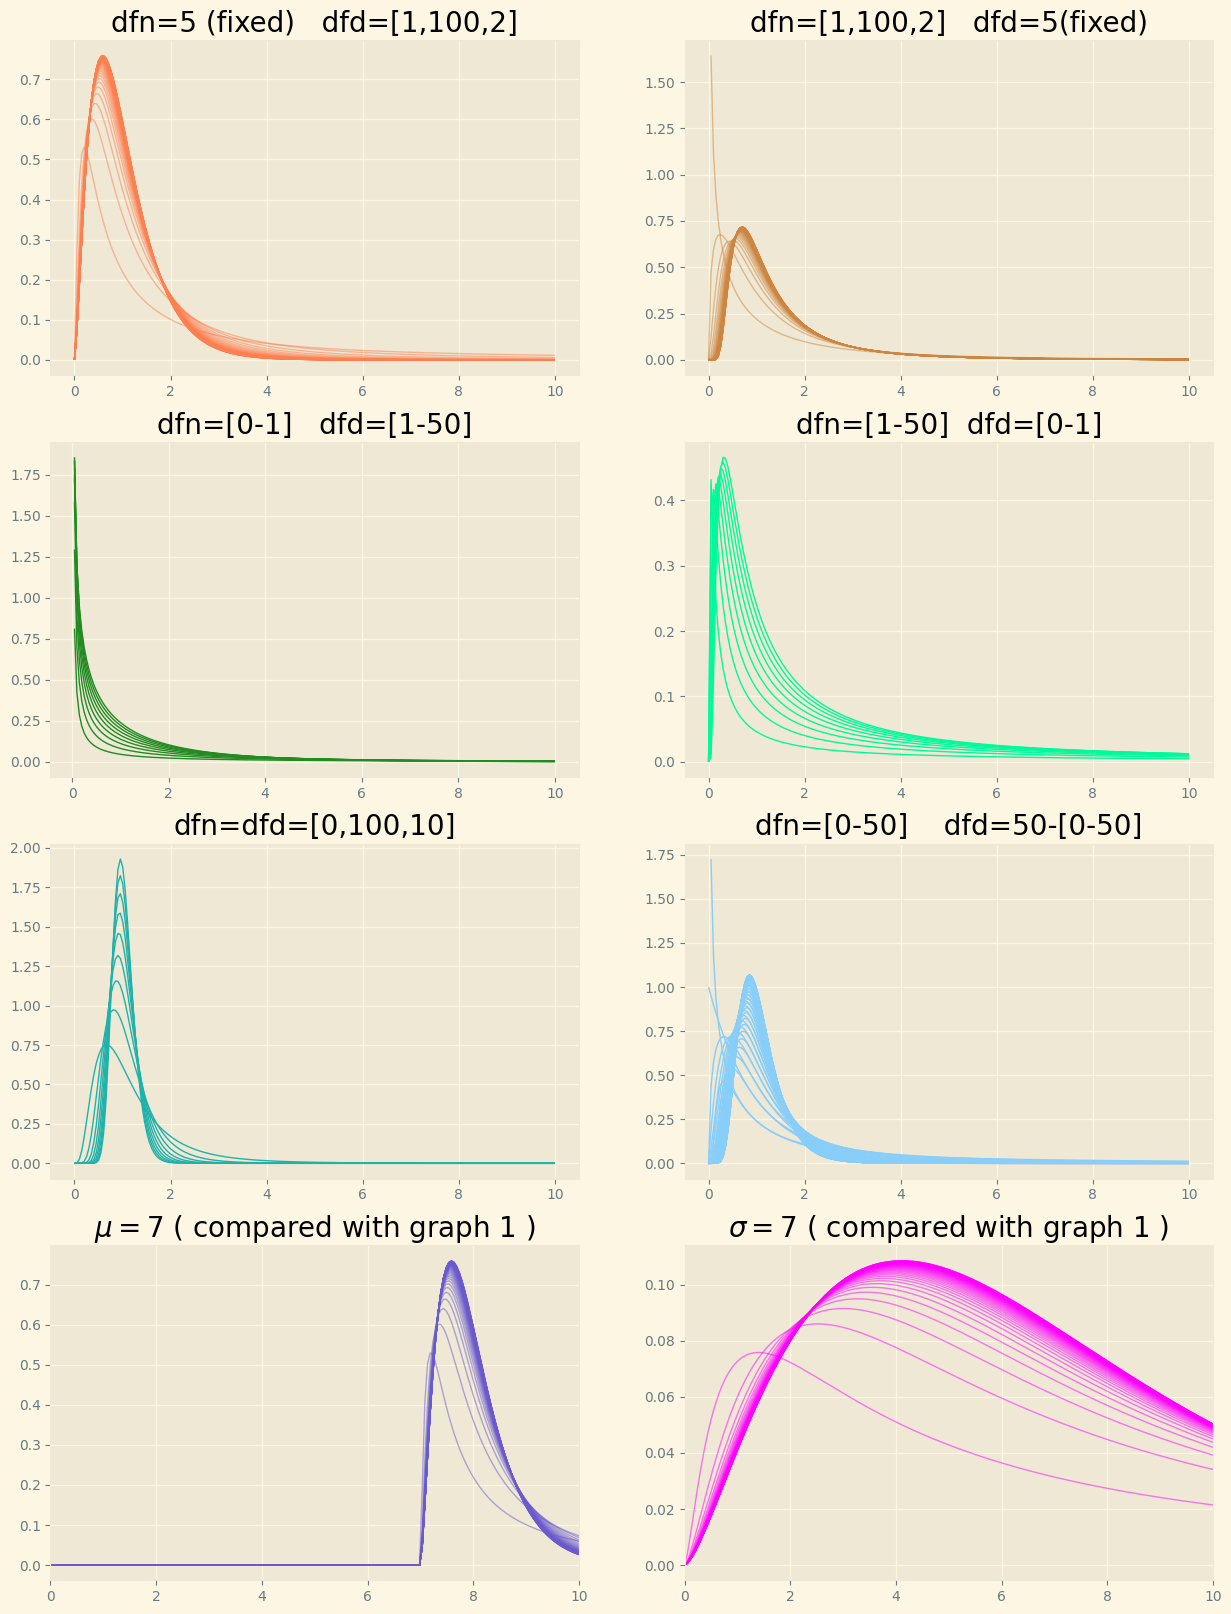

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

plt.style.use("Solarize_Light2")

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

x = np.linspace(0, 10, 200)
y_f1 = f.pdf(x.reshape(-1, 1), 5, np.arange(1, 100, 2))
y_f2 = f.pdf(x.reshape(-1, 1), np.arange(1, 100, 2), 5)
y_f3 = f.pdf(x.reshape(-1, 1), np.linspace(0, 1, 10), np.linspace(1, 50, 10))
y_f4 = f.pdf(x.reshape(-1, 1), np.linspace(1, 50, 10), np.linspace(0, 1, 10))
y_f5 = f.pdf(x.reshape(-1, 1), np.arange(0, 100, 10), np.arange(0, 100, 10))
y_f6 = f.pdf(x.reshape(-1, 1), np.arange(0, 50, 1), 50-np.arange(0, 50, 1))
y_f7 = f.pdf(x.reshape(-1, 1), 5, np.arange(1, 100, 2), loc=7)
y_f8 = f.pdf(x.reshape(-1, 1), 5, np.arange(1, 100, 2), scale=7)


axes[0][0].plot(x, y_f1, linewidth=1, color="coral",alpha=0.5)
axes[0][0].set_title("dfn=5 (fixed)   dfd=[1,100,2]", fontsize=20)

axes[0][1].plot(x, y_f2, linewidth=1, color="peru",alpha=0.5)
axes[0][1].set_title("dfn=[1,100,2]   dfd=5(fixed)", fontsize=20)

axes[1][0].plot(x, y_f3, linewidth=1, color="forestgreen")
axes[1][0].set_title("dfn=[0-1]   dfd=[1-50]", fontsize=20)

axes[1][1].plot(x, y_f4, linewidth=1, color="mediumspringgreen")
axes[1][1].set_title("dfn=[1-50]  dfd=[0-1]", fontsize=20)

axes[2][0].plot(x, y_f5, linewidth=1, color="lightseagreen")
axes[2][0].set_title("dfn=dfd=[0,100,10]", fontsize=20)

axes[2][1].plot(x, y_f6, linewidth=1, color="lightskyblue")
axes[2][1].set_title("dfn=[0-50]    dfd=50-[0-50]", fontsize=20)


axes[3][0].plot(x, y_f7, color="slateblue", linewidth=1,alpha=0.5)
axes[3][0].set_xlim([0, 10])
axes[3][0].set_title("$\mu=7$ ( compared with graph 1 )", fontsize=20)


axes[3][1].plot(x, y_f8, linewidth=1, color="fuchsia",alpha=0.5)
axes[3][1].set_xlim([0, 10])
axes[3][1].set_title("$\sigma=7$ ( compared with graph 1 )", fontsize=20)


### 離散型分配函數


#### 波松分配 + 二項分配

注意事項與討論 : 

- 離散圖形 : 必用 stem 圖 ( 莖葉圖 )表示，若用.plot()則會呈現連續分布

- 波松公式 -> $f(k)=exp(-u)\frac{u^{k}}{k!}$ ， 其中 k 和 $u$ 是變數

- 波松 pmf 模組使用方式 : poisson.pmf( k , mu , loc = 0 ) ( cdf 參數相同 )

- 二項分配公式 -> $f(k)=\left(\begin{array}{c}n\\ k\end{array}\right)p^{k}(1-p)^{n-k}$

- 二項 pmf 模組使用方式 : binom.pmf ( k , n , p , loc=0 )  ( cdf 參數相同 )

- poisson 中的 $\lambda$ = 二項常態分佈的 n * p  ( $\lambda = np$ )

- 承上，其原因是 Poisson是二項分佈的極限情形，反過來說，Poisson 也可以當作二項分佈的近似值

- 假設 $\lambda=2.5$ ，n=25 ， p=0.1 ，則 2.5 = 25 * 0.1 

- markerfmt = 調整 stem 圖頂端標記 , linefmt = 調整 stem 圖線形式 

<hr>

#### 畫圖結果 :

#### 1. PMF

- 顯示 Poisson 在頭尾兩端的$f(x)$分佈比 binomial 高 ，但在中間段落的$f(x)$分佈比 binomial 低

#### 2. CDF 

- 顯示在初期時，Poisson 的累積 $f(x)$ 較高 ，但隨著 $x$ 遞增 ， Binomial 的累積 $f(x)$ 逐漸超過 Poisson



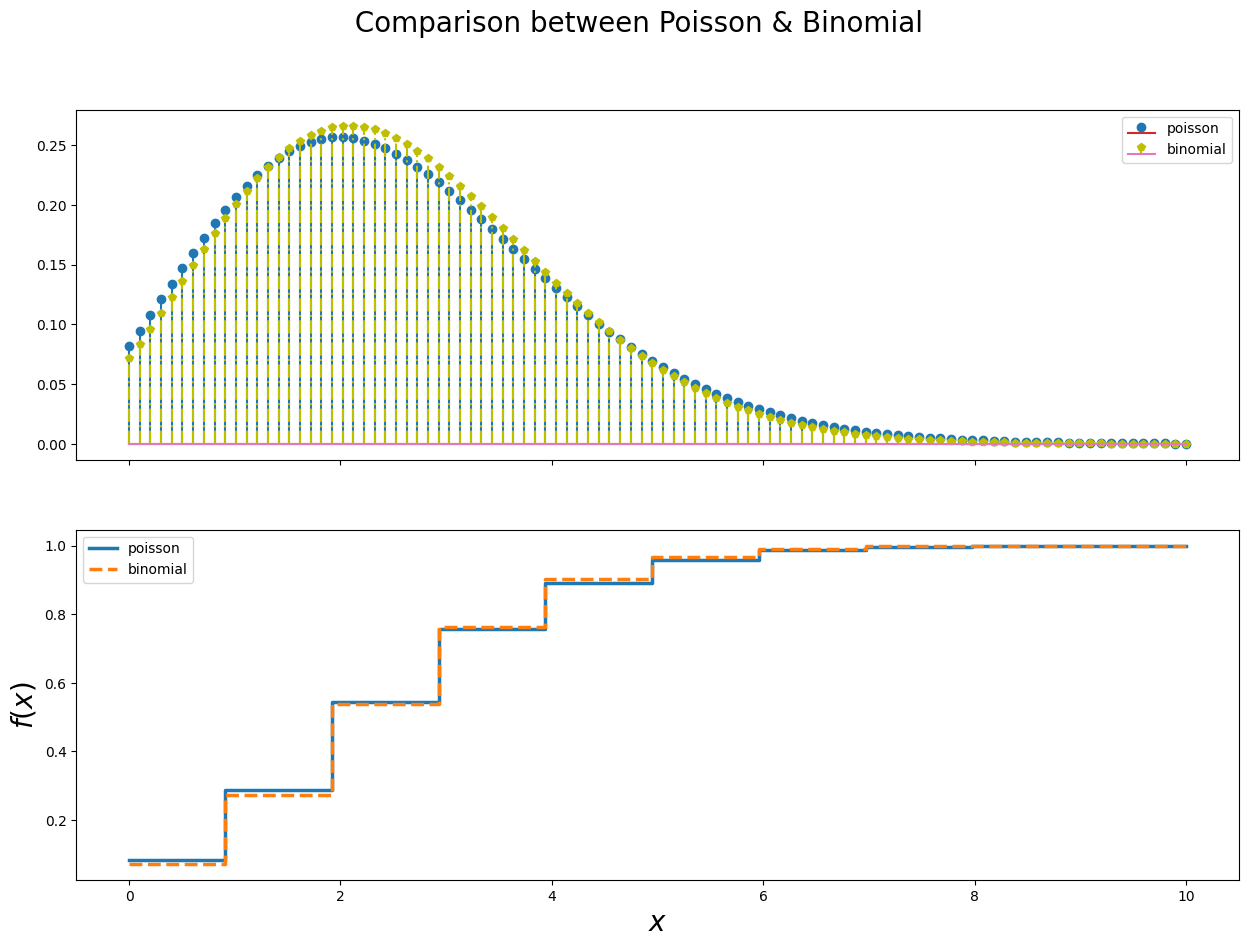

In [55]:
from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom 

x=np.linspace(0,10,100)
math_lambda=2.5
mu=5
n=25
p=0.1

y_psn=poisson.pmf(x.reshape(-1,1),math_lambda)
y_binom=binom.pmf(x.reshape(-1,1),n,p)

y_psnCDF=poisson.cdf(x.reshape(-1,1),math_lambda)
y_binomCDF=binom.cdf(x.reshape(-1,1),n,p)

fig,axes=plt.subplots(2,1,figsize=(15,10),sharex="col")

axes[0].stem(x,y_psn,label="poisson")
axes[0].stem(x,y_binom,linefmt="y-.",markerfmt="p",label="binomial",basefmt="C6")



axes[1].plot(x,y_psnCDF,drawstyle = 'steps-pre',label="poisson",linewidth=2.5)
axes[1].plot(x,y_binomCDF,linestyle="--",drawstyle = 'steps-pre',label="binomial",linewidth=2.5)
axes[1].set_xlabel("$x$",fontsize=20)
axes[1].set_ylabel("$f(x)$",fontsize=20)


plt.suptitle(" Comparison between Poisson & Binomial ",fontsize=20)


for i in range(2):
    axes[i].legend()

